In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

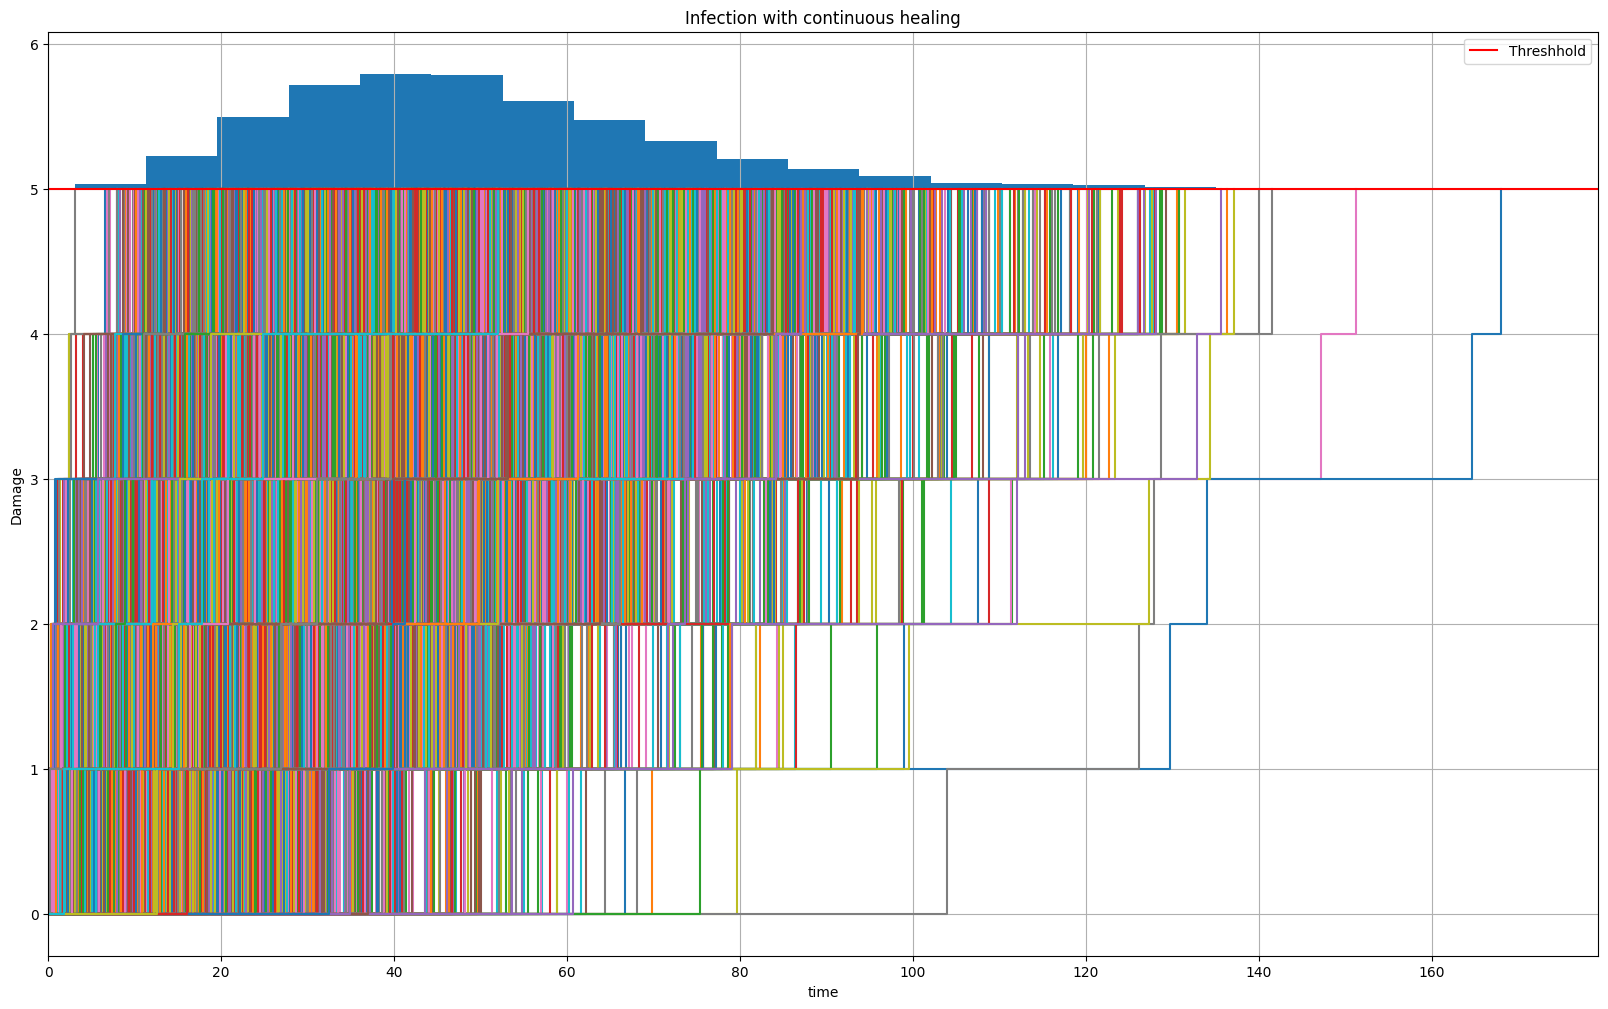

In [32]:
#Continuous healing model
def infection(initial, rate, threshhold, healing_factor):
    states = [initial]
    times = [0]
    current_state = initial
    time = 0
    
    while current_state < threshhold:
        x1 = np.random.uniform(0,1) #Draw random numbers
        tau = -1/rate * np.log(x1) #Calculate time of next transition
        
        #Update values
        time += tau
        current_state += 1
        
        #Account for Bacteria healing itself
        if current_state > 0: 
            current_state -= healing_factor * tau
            if current_state < 0: #Avoid overhealing
                current_state = 0
        
        if current_state > threshhold:
            current_state = threshhold

        #Append lists
        states.append(current_state)
        times.append(time)

    return times, states


N = 5000
initial = 0
rate = 0.1
threshhold = 5
heal = 0
tmax = 0
t_end = []

plt.figure(figsize = (20,12))
plt.title('Infection with continuous healing')
plt.grid()

for i in range(N):
    times, states = infection(initial, rate, threshhold, heal)
    t_end.append(max(times))
    plt.step(times, states, where = 'post')
    if max(times) > tmax:
        tmax = max(times)


plt.plot(np.arange(0,round(tmax + tmax/5)), threshhold * np.ones(round(tmax + tmax/5)), color = 'red', label = 'Threshhold')
plt.hist(t_end, bins = 20, weights = np.full(N, threshhold/N), bottom = threshhold)
plt.xlabel('time')
plt.ylabel('Damage')
plt.xlim(0,tmax + tmax/15)
plt.legend()


# Write Latex Document of code
# Make Histogram of First Passage times
# Make healing a stochastic variable
# Try doing multi-stage infections? Or is it unphysical?

(0.0, 0.03)

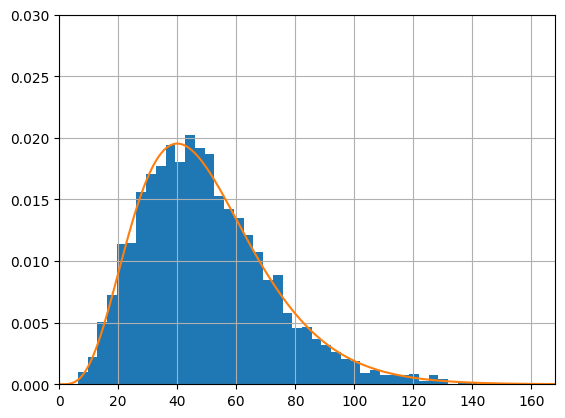

In [50]:
def erlang(x, L, k):
    return L**k * x**(k-1) * np.exp(-L * x) / m.factorial(k-1)

x = np.linspace(0, max(t_end), 1000)
y = erlang(x, rate, threshhold)

plt.figure()
plt.grid()
plt.hist(t_end, density = True, bins = 50)
plt.plot(x,y)
plt.xlim(0, max(t_end))
plt.ylim(0, 0.03)

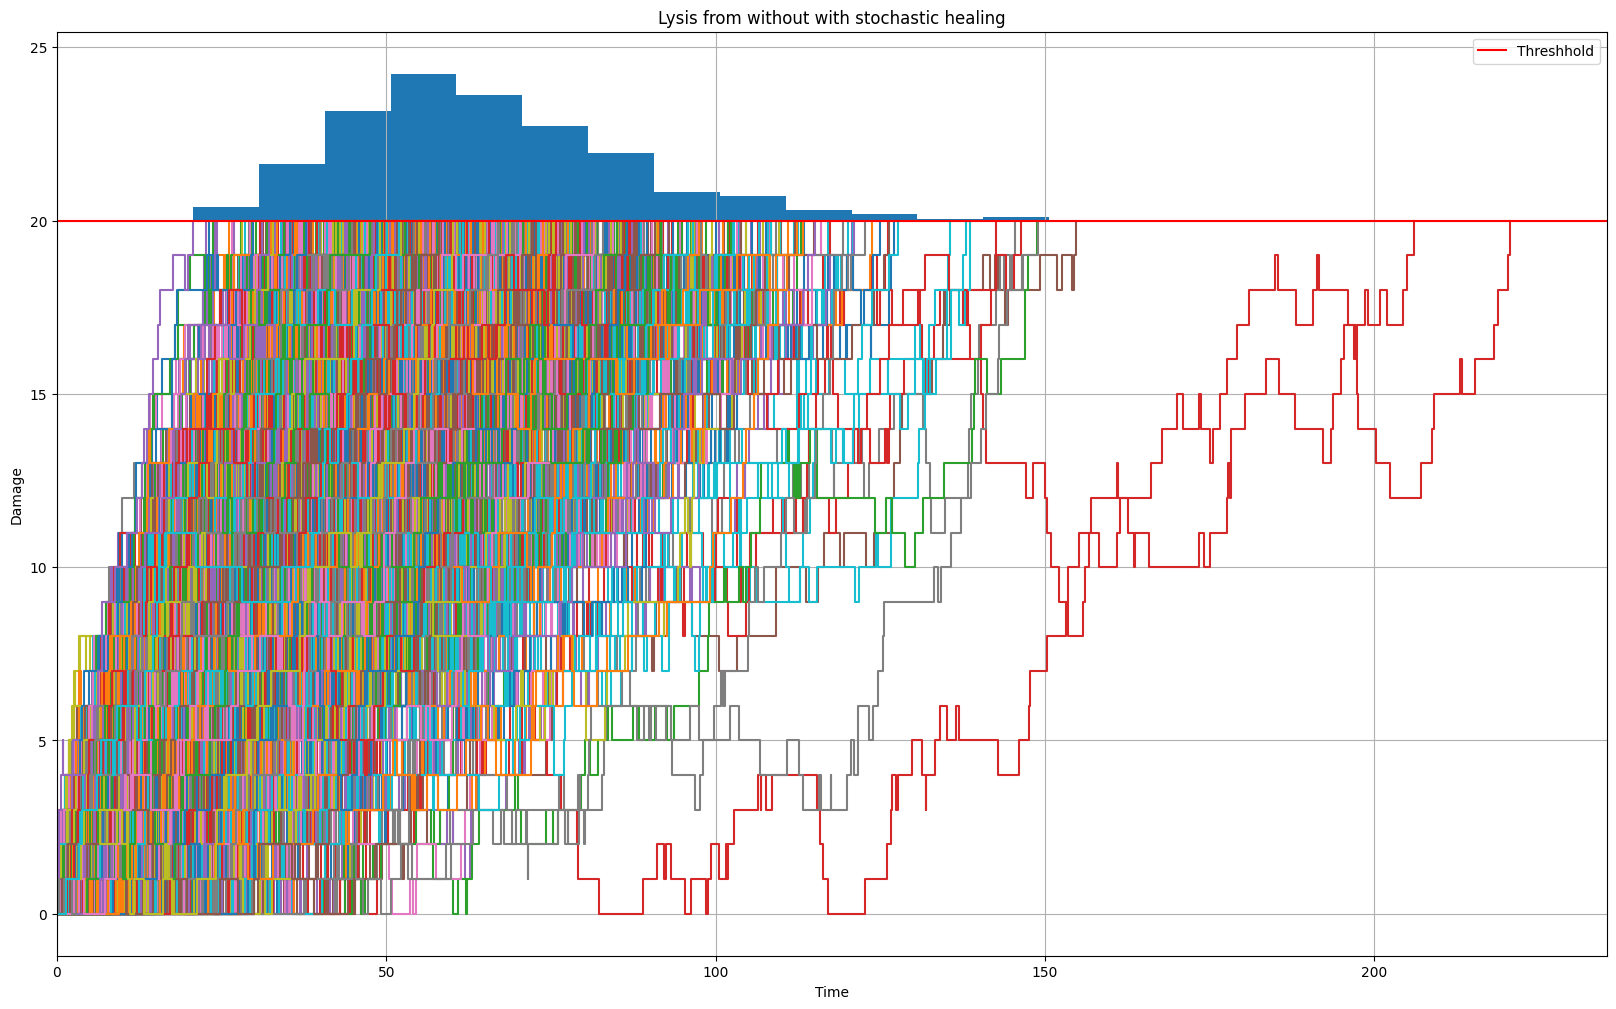

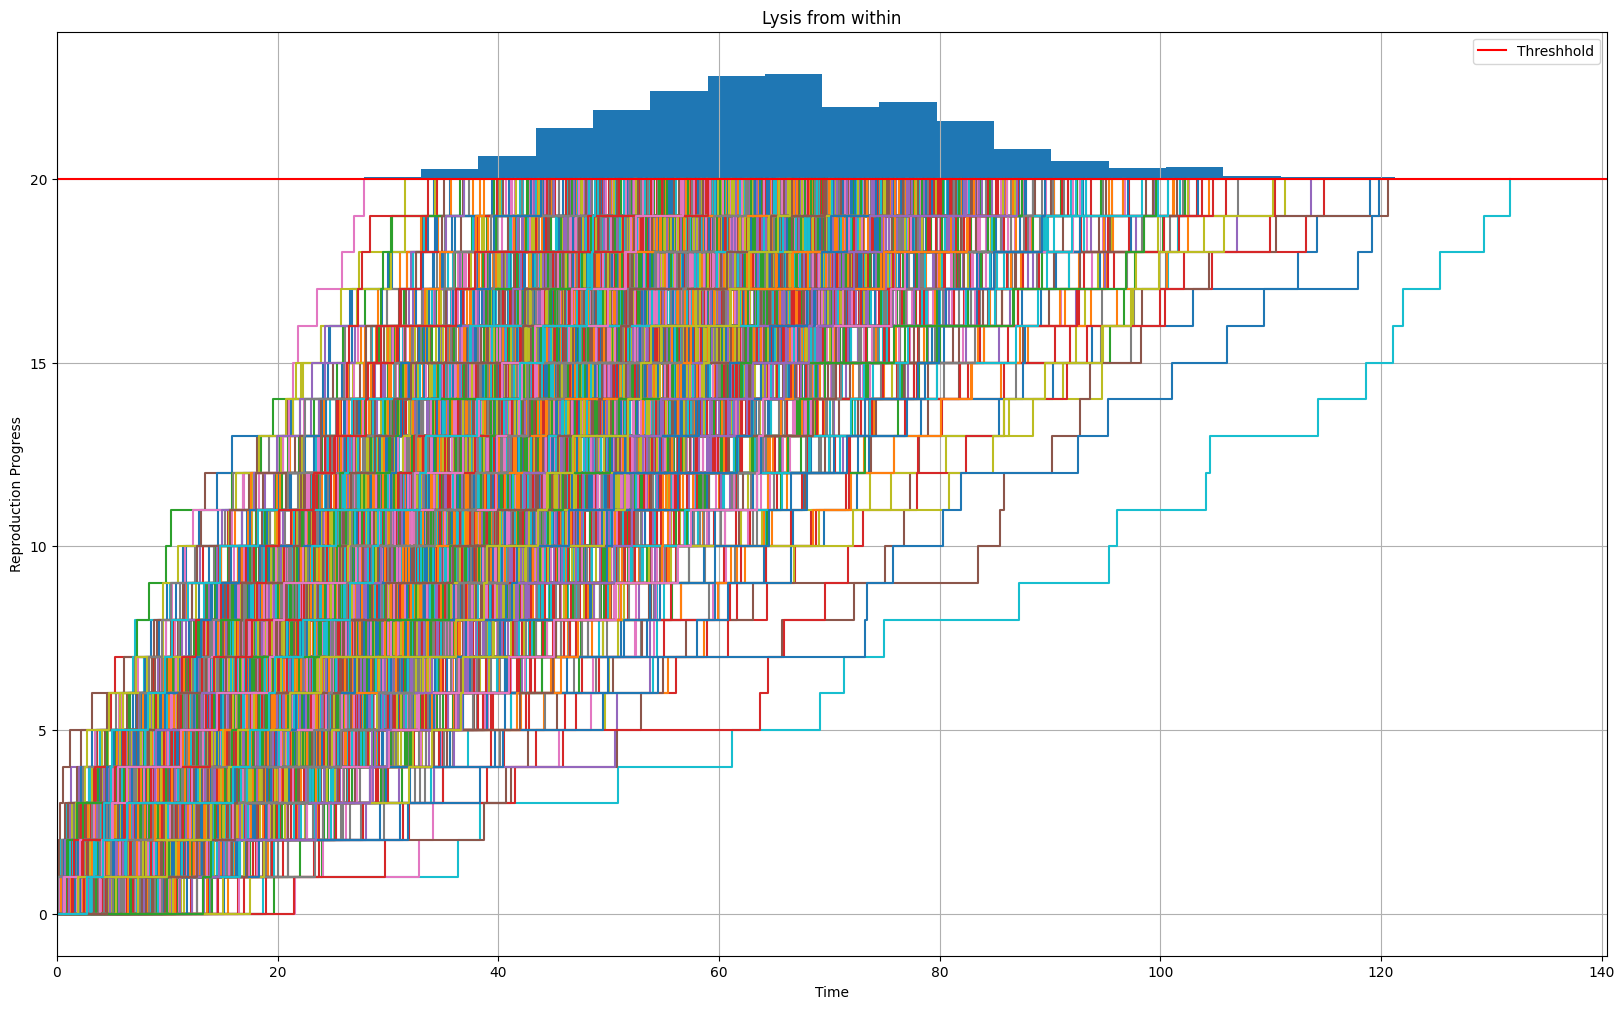

In [88]:
#Lysis from without
#Stochastic healing model
def infection(initial, rate_out, threshhold, healing_factor):
    W = rate_out + healing_factor
    states = [initial]
    times = [0]
    current_state = initial
    time = 0
    
    while current_state < threshhold:
        #Draw random numbers
        x1 = np.random.uniform(0,1)
        x2 = np.random.uniform(0,1)

        #Calculate time of next transition
        tau = -1/W * np.log(x1)
        
        #Damage transition
        if rate_out >= x2 * W:
            current_state += 1
            #Avoid overdamaging
            if current_state > threshhold:
                current_state = threshhold
        
        #Healing transition
        else:
            current_state -= 1
            #Avoid overhealing
            if current_state < 0:
                current_state = 0

        #Update time
        time += tau
        
        #Append lists
        states.append(current_state)
        times.append(time)

    return times, states

#Lysis from within
def within(initial, rate, threshhold):
    states = [initial]
    times = [0]
    current_state = initial
    time = 0

    while current_state < threshhold:
        x1 = np.random.uniform(0,1)
        tau = -1/rate * np.log(x1)

        current_state += 1
        time += tau

        states.append(current_state)
        times.append(time)

    return times, states



N = 1000
initial = 0
rate_out = 0.5
rate_in = 0.3
heal = 0.2
threshhold_out = 20
threshhold_in = 20

t_maxout = 0
t_maxin = 0
t_endout = []
t_endin = []


for i in range(N):
    times_out, states_out = infection(initial, rate_out, threshhold_out, heal)
    times_in, states_in = within(initial, rate_in, threshhold_in)
    t_endout.append(max(times_out))
    t_endin.append(max(times_in))

    plt.figure(0, figsize = (20,12))
    plt.step(times_out, states_out, where = 'post')

    plt.figure(1, figsize = (20,12))
    plt.step(times_in, states_in, where = 'post')

    if max(times_out) > t_maxout:
        t_maxout = max(times_out)
    
    if max(times_in) > t_maxin:
        t_maxin = max(times_in)

#Lysis from without plot
plt.figure(0)
plt.title('Lysis from without with stochastic healing')
plt.grid()
plt.plot(np.arange(0,round(t_maxout + t_maxout/5)), threshhold_out * np.ones(round(t_maxout + t_maxout/5)), color = 'red', label = 'Threshhold')
plt.hist(t_endout, bins = 20, weights = np.full(N, threshhold_out/N), bottom = threshhold_out)
plt.xlabel('Time')
plt.ylabel('Damage')
plt.xlim(0,t_maxout + t_maxout/15)
plt.legend()

#Lysis from within plot
plt.figure(1)
plt.title('Lysis from within')
plt.grid()
plt.plot(np.arange(0,round(t_maxin + t_maxin/5)), threshhold_in * np.ones(round(t_maxin + t_maxin/5)), color = 'red', label = 'Threshhold')
plt.hist(t_endin, bins = 20, weights = np.full(N, threshhold_in/N), bottom = threshhold_in)
plt.xlabel('Time')
plt.ylabel('Reproduction Progress')
plt.xlim(0,t_maxin + t_maxin/15)
plt.legend()

#Compare with Erlang distribution
#Determine P(t) from histogram
#Create model with competing processes: Lysis from within and without.

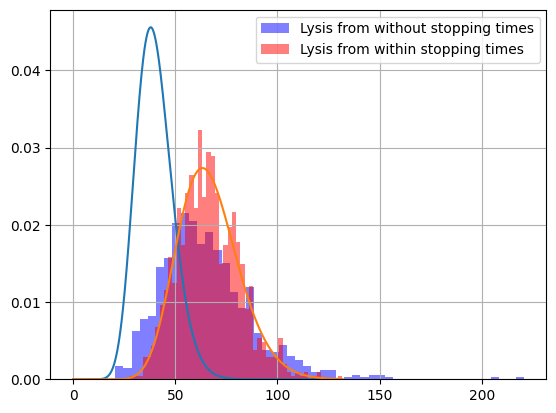

In [89]:
plt.figure()
plt.grid()
plt.hist(t_endout, bins = 50, density = True, color = 'blue', label = 'Lysis from without stopping times', alpha = 0.5)
plt.hist(t_endin, bins = 50, density = True, color = 'red', label = 'Lysis from within stopping times', alpha = 0.5)
x = np.linspace(0, max(t_endin), 1000)
In = erlang(x, rate_in, threshhold_in)
Out = erlang(x, rate_out, threshhold_out)
plt.plot(x, Out)
plt.plot(x, In)
plt.legend()



([<matplotlib.axis.XTick at 0x1a808d153d0>,
 [Text(546, 0, 'LO'), Text(454, 0, 'LI')])

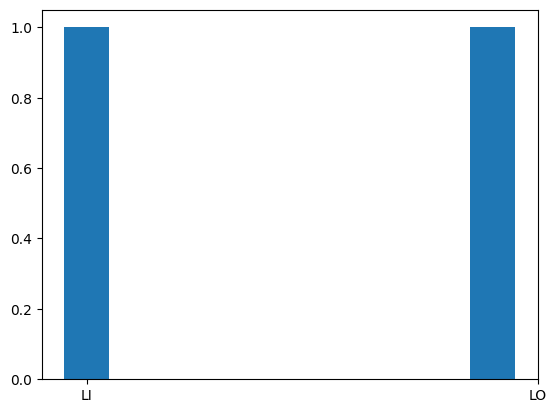

In [100]:
t_endout = np.array([t_endout])
t_endin = np.array([t_endin])
LO_success = t_endout[t_endout < t_endin]
LI_success = t_endin[t_endin < t_endout]
L = [len(LO_success), len(LI_success)]
x = ['LO', 'LI']
plt.hist(L, density = False, align = 'left')
plt.xticks(L, x)